In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\Kirti\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Reading the dataset
df=pd.read_csv('fake_jobs.csv')
df.head(2)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


In [3]:
df.shape
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [4]:
# To know how many null values are there in the dataset
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

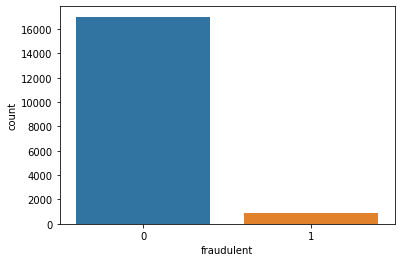

In [5]:
# To count the number of classes
sns.countplot(x=df.fraudulent)

- Clearly the dataset is unbalancad and traditonal techniques like logistic and decision tree will not identify the fradulent job posting accurately

In [6]:
# The main column for our algorithm is description and it only contain few null values
df=df['description'].fillna(method='ffill')
df.isnull().sum()

0

In [7]:
# Cleaning the text...Now the textcontains number and special character which needs to be removed
import re
def clean_text(text):
    text=re.sub('[^a-zA-Z]',' ',text)
    text=re.sub('-:,@#$!%&/',' ',text)
    text=text.lower()
    return text

In [8]:
# Applying the function on the dataframe
df['new_description']=df.apply(lambda x:clean_text(x))

In [9]:
# Removing the stopwords...The stopwords are like is,in,you and so many these all stop words doesn't make sense to 
# Machine learning algorithm
import nltk
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
def remove_stopwords(text):
    stop_text=[w for w in text.split() if not w in stop_words ]
    return '  '.join(stop_text)
df['new_description']=df.apply(lambda x:remove_stopwords(x))
df['new_description'].head()

AttributeError: 'Series' object has no attribute 'split'

In [11]:
# Lemmatizig the document
#from nltk.stem import WordNetLemmatizer
#lematizer=WordNetLemmatizer()
#for i in df.new_description:
#    lematizer.lemmatize(i)
#df['new_description'].head()    

In [12]:
# Dividing the dataset into X and y
X=df['new_description']
y=df['fraudulent']

In [13]:
# Splitting the dataset into training and testing part
from sklearn.model_selection import train_test_split
seed = 10
test_size = 0.3
sentence_train, sentence_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed) 

In [14]:
# Converting the data in a form so that the algorithm can understand
#Count Vectorizer is a bag of words approach it will take all the words in a bag and form a vector of that size for each
# sentence..for example it will take a word from the bag and if that word is present in the sentance it will put 1 over there
# otherwise 0 in place of that word and similarly it will do for all the words present in the sentance and in the document
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(sentence_train)
X_train = vectorizer.fit_transform(sentence_train)
X_test  = vectorizer.transform(sentence_test)

In [53]:
# To know which word is assign to which numbr
#vectorizer.vocabulary_

In [55]:
# to extract the feature names
#vectorizer.get_feature_names()

In [15]:
# the train and test data has converted into vector
a=X_train.toarray()
a

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
a[0]
a[0].shape

(47837,)

In [17]:
vectorizer.inverse_transform(a[0])

[array(['access', 'applicants', 'area', 'available', 'comfort', 'data',
        'desirable', 'desire', 'earning', 'entry', 'experience', 'field',
        'following', 'home', 'homes', 'honest', 'however', 'internet',
        'least', 'motivated', 'needed', 'old', 'openings', 'people', 'per',
        'preferred', 'seeking', 'self', 'several', 'skills', 'typing',
        'week', 'work', 'years'], dtype='<U92')]

# Training the model

In [60]:
# The classes are imbalanced that's why assigning the weights so that it get balanced
from sklearn.linear_model import LogisticRegression
bal={0:1,1:10}
model = LogisticRegression(class_weight=bal)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 10}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
con_mat = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(con_mat)

Confusion Matrix
[[5045   76]
 [  82  161]]


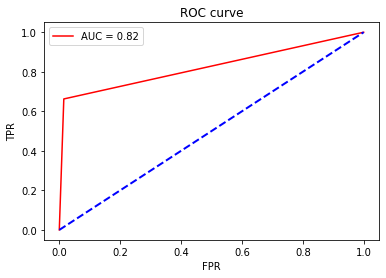

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, threshold = roc_curve(y_test, pred, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.9705443698732289
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5121
           1       0.68      0.66      0.67       243

    accuracy                           0.97      5364
   macro avg       0.83      0.82      0.83      5364
weighted avg       0.97      0.97      0.97      5364



In [46]:
# TF IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,ngram_range=(2,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(sentence_train)
X_test_tfidf = tfidf_vectorizer.transform(sentence_test)

In [47]:
X_vect=X_train_tfidf.toarray()
Xt_vect=X_test_tfidf.toarray()

In [48]:
from sklearn.linear_model import LogisticRegression
bal={0:1,1:10}
model_1 = LogisticRegression(class_weight=bal)
model_1.fit(X_vect,y_train)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 10}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
from sklearn.metrics import confusion_matrix
pred = model_1.predict(Xt_vect)
con_mat = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(con_mat)

Confusion Matrix
[[5060   61]
 [  82  161]]


In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.9733407904548844
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5121
           1       0.73      0.66      0.69       243

    accuracy                           0.97      5364
   macro avg       0.85      0.83      0.84      5364
weighted avg       0.97      0.97      0.97      5364

